Wed Oct 19 18:41:16 EDT 2016
lsrgpu01-d
Linux lsrgpu01-d 3.10.0-327.18.2.el7.x86_64 #1 SMP Thu May 12 11:03:55 UTC 2016 x86_64 x86_64 x86_64 GNU/Linux
areacello shape  (576, 720)
ssu shape (73, 576, 720)
runtime = 4.036423 s


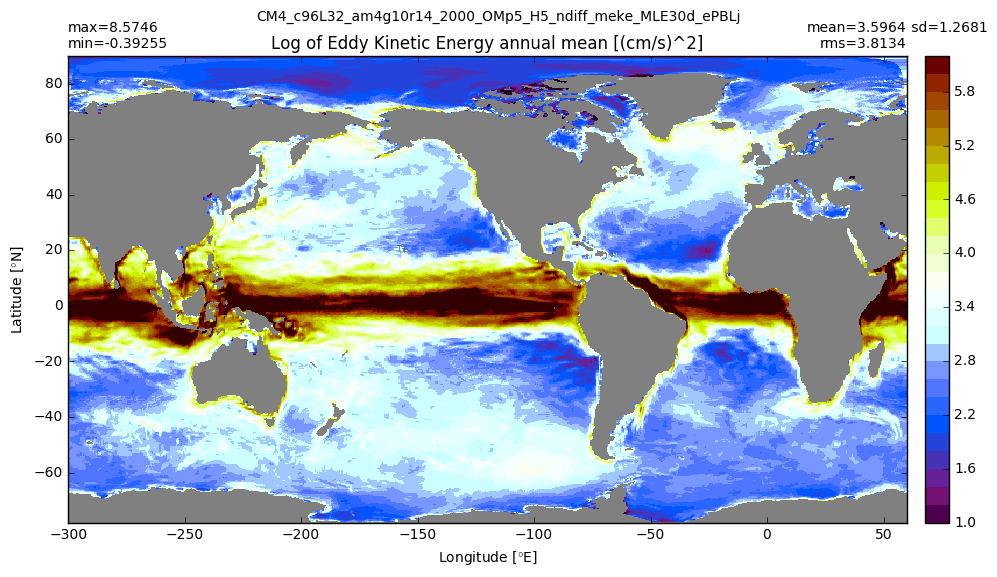

In [6]:
# Import necessary modules
import netCDF4
import matplotlib.pyplot as plt
import numpy
import m6plot
from matplotlib.colors import LogNorm
from timeit import default_timer as timer
%matplotlib inline

!date
!hostname
!uname -a


def EKEplot(expName, gridFile, velocityFile):

    ocean_daily = netCDF4.MFDataset(velocityFile)
  
    if 'ssu' not in ocean_daily.variables: raise Exception('Could not find "ssu" in file "%s"'%(cmdLineArgs.annual_file))
    if 'ssv' not in ocean_daily.variables: raise Exception('Could not find "ssv" in file "%s"'%(cmdLineArgs.annual_file))

    # Now read the grid from the super-grid. Note the various one-line equivalents of the multiple steps used above.
    superGridFile = netCDF4.Dataset(gridFile)
    x = superGridFile.variables['geolon'][:,:]
    y = superGridFile.variables['geolat'][:,:]
    msk = superGridFile.variables['wet'][:,:]
    area = superGridFile.variables['areacello'][:,:]
    print("areacello shape ", area.shape)
    #[t,z,y,x] corresponds to axis [0,1,2,3] which can be indexed by [-4,-3,-2,-1]

    ssu = ocean_daily.variables['ssu']
    print ("ssu shape", ssu.shape)
    #plt.pcolormesh(ssu[1]); plt.show(block=False)


    ssu_mean = ssu[:].mean(axis=0)

    eke_u = (0.5*(ssu[:]-ssu_mean)**2).mean(axis=0)
    eke = (eke_u + numpy.roll(eke_u,1,axis=-1))/2 # U-point to T-point transform

    ssv = ocean_daily.variables['ssv']
    ssv_mean = ssv[:].mean(axis=0)
    eke_v = (0.5*(ssv[:]-ssv_mean)**2).mean(axis=0)
    eke = eke + (eke_v + numpy.roll(eke_v,1,axis=-2))/2 

    #factor of 10000 to convert to (cm/s)^2
    eke = 10000*eke

    #clip the extreme small values that cause log to blow up
    #eke = eke.clip(min=1.0e-8)

    ##The logscale=True of matplotlib.pyplot does not work!
    ##So, pass the log to be plotted instead
    eke = numpy.log(eke)
    plot_title = 'Log of Eddy Kinetic Energy annual mean [(cm/s)^2]'

    m6plot.xyplot( eke, x, y, area=area, suptitle=expName, title=plot_title)

    #Plot with a logarithmic color scale
    #plt.pcolormesh(eke,norm = LogNorm()); plt.colorbar() ; plt.show()

    
start = timer()

EKEplot('CM4_c96L32_am4g10r14_2000_OMp5_H5_ndiff_meke_MLE30d_ePBLj',
        '/home/Niki.Zadeh/work_archive/verona_mom6_2016.06.29_NEMO/CM4_c96L32_am4g10r14_2000_OMp5_H5_ndiff_meke_MLE30d_ePBLj/gfdl.ncrc4-intel16-prod-openmp/history/00600101.nc/00600101.ocean_static_no_mask_table.nc',
        '/home/Niki.Zadeh/work_archive/verona_mom6_2016.06.29_NEMO/CM4_c96L32_am4g10r14_2000_OMp5_H5_ndiff_meke_MLE30d_ePBLj/gfdl.ncrc4-intel16-prod-openmp/history/00600101.nc/00600101.ocean_5daily.nc'
        )

dt = timer() - start
print ("runtime = %f s" % dt)



areacello shape  (1080, 1440)
ssu shape (73, 1080, 1440)
runtime = 14.702080 s


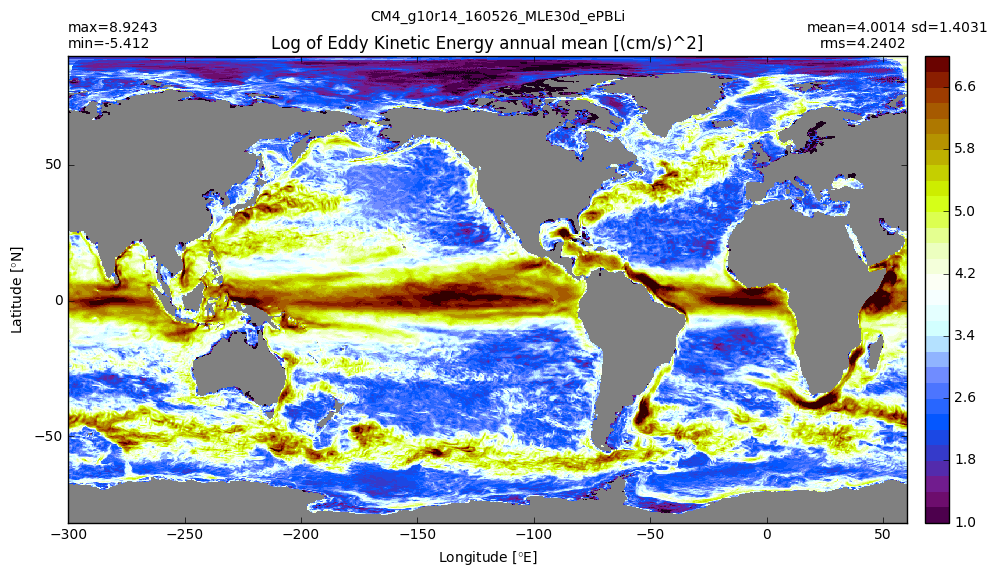

In [8]:
start = timer()

EKEplot('CM4_g10r14_160526_MLE30d_ePBLi',
        '/home/Niki.Zadeh/work_archive/Bonnie.Samuels_353/verona_mom6_2016.09.23/CM4_g10r14_160526_MLE30d_ePBLi/gfdl.ncrc3-intel15-prod-openmp/history/00600101.nc/00600101.ocean_static_no_mask_table.nc',
        '/home/Niki.Zadeh/work_archive/Bonnie.Samuels_353/verona_mom6_2016.09.23/CM4_g10r14_160526_MLE30d_ePBLi/gfdl.ncrc3-intel15-prod-openmp/history/00600101.nc/00600101.ocean_5daily.nc'
        )

dt = timer() - start
print ("runtime = %f s" % dt)
